In [1]:
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras
from file_io import features_from_file, labels_from_file, add_history
from utils import labels_to_categorical, transpose_vector, get_count, get_mean_stddev, normalize_data,norm_multiple
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
%cd "C:/Users/admin/Documents/AgeDetection/voice-bases-age-gender-classification/"

C:\Users\admin\Documents\AgeDetection\voice-bases-age-gender-classification


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
age_model = tf.keras.models.load_model("model/lstm_age_41/lstm_age_41_100.keras")
gender_model = tf.keras.models.load_model("model/lstm_gender_41/lstm_gender_41_30.keras")

In [4]:
gender_means = "model\lstm_gender_41\means_gender_41.npy"
gender_std_dev = "model\lstm_gender_41\stddev_gender_41.npy"

In [5]:
input_test_file_gender = "gender_data_clean_2/gender_in"
output_test_file_gender = "gender_data_clean_2/gender_out"
input_test = features_from_file(input_test_file_gender, 41)
input_test = transpose_vector(input_test)
output_test = labels_from_file(output_test_file_gender)
output_test = labels_to_categorical(output_test)

X_gender_test = input_test
Y_gender_test = output_test

In [6]:
means, std_dev = get_mean_stddev(X_gender_test)
X_gender_test = normalize_data(X_gender_test, means, std_dev)

In [7]:
y_pred = gender_model.predict(X_gender_test)
y_pred = np.around(y_pred, decimals=0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [8]:
Y_gender_class = Y_gender_test[:,0]
Y_gender_class_pred = y_pred[:,0]


In [9]:
conf_matrix = confusion_matrix(Y_gender_class, Y_gender_class_pred)
row_sums = conf_matrix.sum(axis=1)
norm_conf_matrix = conf_matrix / row_sums[:, np.newaxis]
acc_score = accuracy_score(Y_gender_class, Y_gender_class_pred)
print("Score of prediction:", acc_score)

Score of prediction: 0.904


In [10]:
labels = ["Male", "Femal"]

<Axes: >

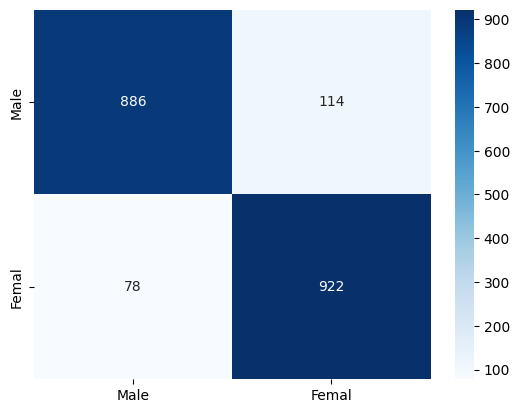

In [11]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

In [12]:
report = classification_report(Y_gender_class, Y_gender_class_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

        Male       0.92      0.89      0.90      1000
       Femal       0.89      0.92      0.91      1000

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

